#Download Data From Google Earth and Visualize

In [ ]:
import ee

ee.Authenticate()
ee.Initialize(project='ethereal-brace-419217')

# Define the Landsat 8 image collection
l8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')

# Define the initial region coordinates
region_coords = [[72.82121049955751, 19.067336060294295],
                 [72.86858903959657, 19.067336060294295],
                 [72.86858903959657, 19.112109138893043],
                 [72.82121049955751, 19.112109138893043],
                 [72.82121049955751, 19.067336060294295]]

# Convert the region coordinates to an EE geometry
region_geometry = ee.Geometry.Polygon(region_coords)

# Define the number of images to download
num_images = 1000

# Loop to download images while moving right in direction
for i in range(num_images):
    # Filter the Landsat 8 image collection
    filtered_collection = l8.filterBounds(region_geometry) \
                            .filterDate('2023-01-02', '2023-12-31') \
                            .sort('CLOUD_COVER')

    # Select the first image from the filtered collection
    image = filtered_collection.first()

    # Define true color combination (bands 4, 3, 2)
    trueColor = image.select(["SR_B4", "SR_B3", "SR_B2"])

    # Define false color combination (bands 7, 6, 4)
    falseColor = image.select(["SR_B7", "SR_B6", "SR_B4"])

    # Export true color image to Google Drive
    task_true_color = ee.batch.Export.image.toDrive(image=trueColor,
                                                    description='true_Color_' + str(i),
                                                    folder="Final_true color",
                                                    scale=30,
                                                    region=region_geometry)
    task_true_color.start()

    # Export false color image to Google Drive
    task_false_color = ee.batch.Export.image.toDrive(image=falseColor,
                                                     description='false_Color_' + str(i),
                                                     folder="Final_false color",
                                                     scale=30,
                                                     region=region_geometry)
    task_false_color.start()

    # Adjust the region coordinates for the next iteration (move right)
    for j in range(len(region_coords)):
        region_coords[j][0] += 0.01  # Adjust the longitude (move right)

    # Update the region geometry with the new coordinates
    region_geometry = ee.Geometry.Polygon(region_coords)


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 31.5 MB/s eta 0:00:00


In [ ]:
import rasterio
from matplotlib import pyplot

In [ ]:
src = rasterio.open("/content/drive/MyDrive/Final_false color (1)/false_Color_999.tif")

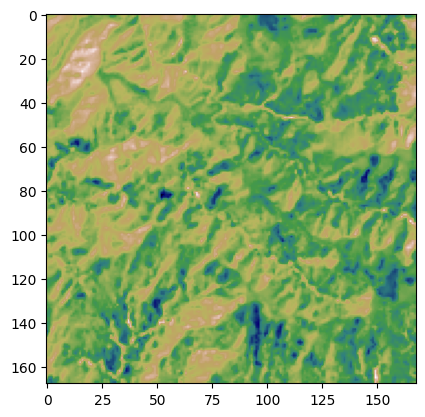

In [ ]:
pyplot.imshow(src.read(2),cmap="gist_earth_r")

In [ ]:
src1 = rasterio.open("/content/drive/MyDrive/Final_true color (1)/true_Color_999.tif")

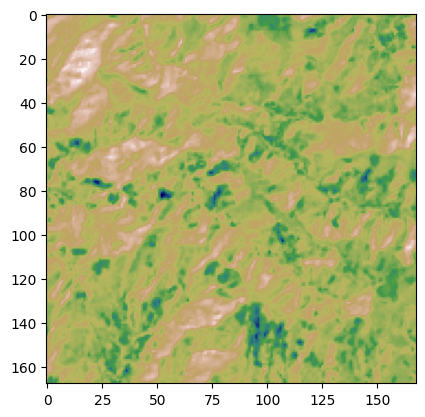

In [ ]:
pyplot.imshow(src1.read(2),cmap="gist_earth_r")

In [ ]:
src = rasterio.open("/content/drive/MyDrive/ content drive MyDrive Dataset Formation trials false color/Final_False_Color_0.tif")

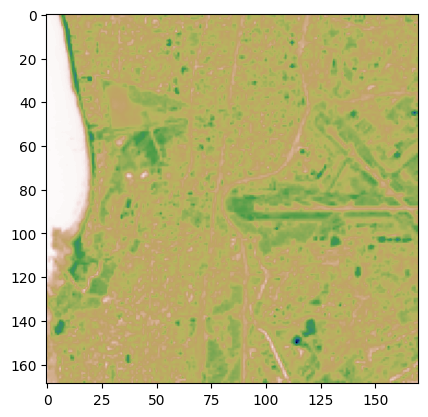

In [ ]:
pyplot.imshow(src.read(2),cmap="gist_earth_r")

In [ ]:
src = rasterio.open("/content/drive/MyDrive/ content drive MyDrive Dataset Formation trials true color/Final_true_Color_0.tif")

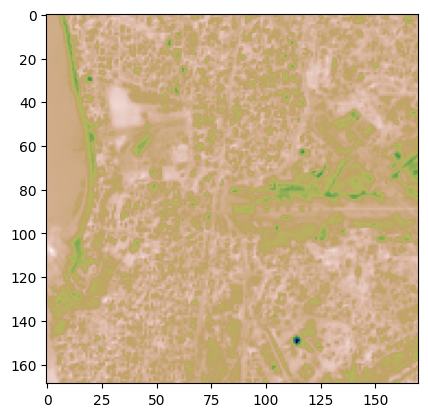

In [ ]:
pyplot.imshow(src.read(2),cmap="gist_earth_r")